<a href="https://colab.research.google.com/github/Janhvi-Pandya/virtual-infra-monitoring/blob/main/virtual_infra_monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import time

# Simulating Virtual Machine Start
print("Starting Virtual Machine...")
time.sleep(2)  # Simulated Boot Time
print("VM is running.")

# Simulating System Performance Monitoring
cpu_usage = os.popen("top -bn1 | grep 'Cpu(s)'").read()
memory_usage = os.popen("free -m").read()

# Display system stats in Google Colab output
print("=== Virtual Machine Status ===")
print(cpu_usage)
print(memory_usage)

# Saving Logs as a Report
with open("vm_status.txt", "w") as f:
    f.write("=== Virtual Machine Status ===\n")
    f.write(cpu_usage + "\n")
    f.write(memory_usage + "\n")

print("\n✅ Virtual Machine status saved to vm_status.txt")


Starting Virtual Machine...
VM is running.
=== Virtual Machine Status ===
%Cpu(s): 58.1 us, 38.7 sy,  0.0 ni,  0.0 id,  0.0 wa,  0.0 hi,  3.2 si,  0.0 st

               total        used        free      shared  buff/cache   available
Mem:           12978         698        8111           1        4169       11971
Swap:              0           0           0


✅ Virtual Machine status saved to vm_status.txt


In [2]:
!cat vm_status.txt


=== Virtual Machine Status ===
%Cpu(s): 58.1 us, 38.7 sy,  0.0 ni,  0.0 id,  0.0 wa,  0.0 hi,  3.2 si,  0.0 st

               total        used        free      shared  buff/cache   available
Mem:           12978         698        8111           1        4169       11971
Swap:              0           0           0



In [3]:
from google.colab import files
files.download("vm_status.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🔍 Monitoring Virtual Machine System Health...
📌 22:38:38 - CPU: 71.0% | Memory: 988MB
📌 22:38:43 - CPU: 3.3% | Memory: 993MB
📌 22:38:48 - CPU: 0.0% | Memory: 994MB
📌 22:38:54 - CPU: 3.2% | Memory: 1017MB
📌 22:38:59 - CPU: 3.2% | Memory: 1017MB
📌 22:39:04 - CPU: 0.0% | Memory: 1000MB

✅ System performance log saved as 'vm_performance_log.csv'.


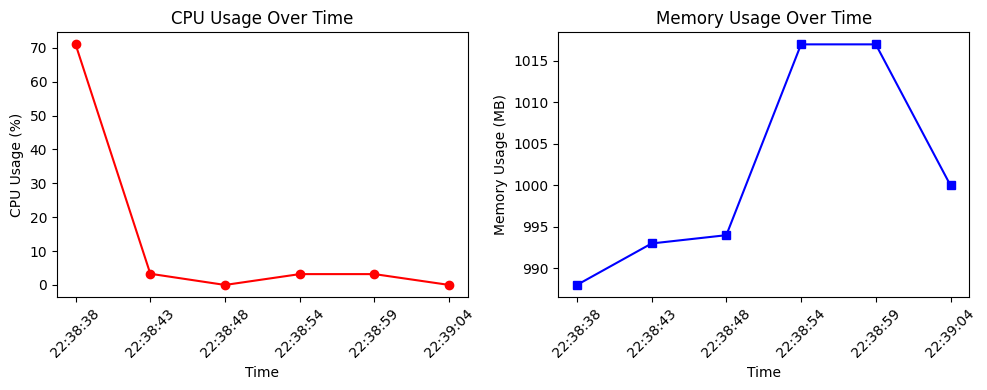


📊 Graph saved as 'vm_performance_graph.png'


In [4]:
import os
import time
import pandas as pd
import matplotlib.pyplot as plt

# Set monitoring duration (seconds) and interval
monitor_duration = 30  # Run for 30 seconds
interval = 5  # Collect data every 5 seconds

# Create lists to store the logs
timestamps = []
cpu_usages = []
memory_usages = []

print("🔍 Monitoring Virtual Machine System Health...")

# Monitor system health over time
start_time = time.time()
while time.time() - start_time < monitor_duration:
    # Collect system data
    cpu_usage = os.popen("top -bn1 | grep 'Cpu(s)'").read()
    memory_usage = os.popen("free -m").read()

    # Extract numeric values (basic parsing)
    cpu_percent = float(cpu_usage.split()[1])  # Adjust index if needed
    memory_total = int(memory_usage.split()[7])  # Total Memory
    memory_used = int(memory_usage.split()[8])  # Used Memory

    # Store data
    timestamps.append(time.strftime("%H:%M:%S"))
    cpu_usages.append(cpu_percent)
    memory_usages.append(memory_used)

    print(f"📌 {timestamps[-1]} - CPU: {cpu_percent}% | Memory: {memory_used}MB")

    time.sleep(interval)  # Wait before next check

# Save logs to a CSV file
df = pd.DataFrame({"Timestamp": timestamps, "CPU Usage (%)": cpu_usages, "Memory Usage (MB)": memory_usages})
df.to_csv("vm_performance_log.csv", index=False)

print("\n✅ System performance log saved as 'vm_performance_log.csv'.")

# Plot graphs
plt.figure(figsize=(10, 4))

# CPU Usage Plot
plt.subplot(1, 2, 1)
plt.plot(timestamps, cpu_usages, marker='o', linestyle='-', color='r')
plt.xlabel("Time")
plt.ylabel("CPU Usage (%)")
plt.title("CPU Usage Over Time")
plt.xticks(rotation=45)

# Memory Usage Plot
plt.subplot(1, 2, 2)
plt.plot(timestamps, memory_usages, marker='s', linestyle='-', color='b')
plt.xlabel("Time")
plt.ylabel("Memory Usage (MB)")
plt.title("Memory Usage Over Time")
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("vm_performance_graph.png")
plt.show()

print("\n📊 Graph saved as 'vm_performance_graph.png'")


In [19]:
!find / -name "vm_performance_graph.png" 2>/dev/null


/content/vm_performance_graph.png


In [68]:
!ls -lh


total 60K
-rw-r--r-- 1 root root   27 Jan 21 23:24 README.md
drwxr-xr-x 3 root root 4.0K Jan 21 23:18 virtual-infra-monitoring
-rw-r--r-- 1 root root  41K Jan 21 23:24 vm_performance_graph.png
-rw-r--r-- 1 root root  148 Jan 21 23:24 vm_performance_log.csv
-rw-r--r-- 1 root root  320 Jan 21 23:24 vm_status.txt
